In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, Model
from keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Flatten, Dense, Dropout, SeparableConv2D

In [65]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [66]:
# Concatenate training and test sets for analysis
x_all = np.concatenate((x_train, x_test), axis=0)
y_all = np.concatenate((y_train, y_test), axis=0)

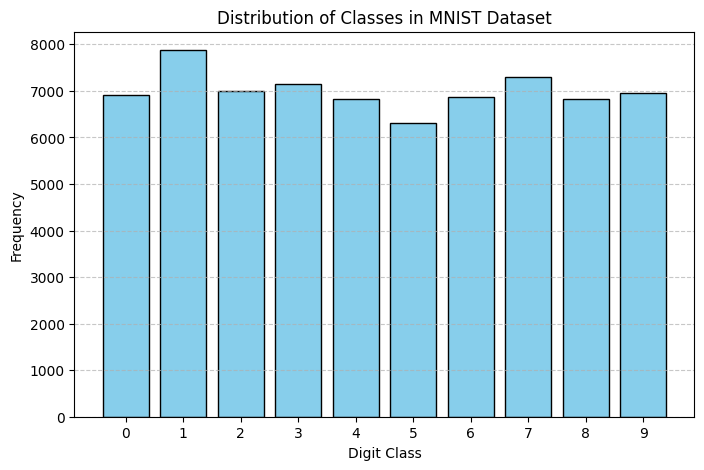

In [67]:
# Plot distribution of classes
plt.figure(figsize=(8, 5))
plt.hist(y_all, bins=np.arange(11)-0.5, rwidth=0.8, color='skyblue', edgecolor='black')
plt.xticks(np.arange(10))
plt.xlabel('Digit Class')
plt.ylabel('Frequency')
plt.title('Distribution of Classes in MNIST Dataset')
plt.savefig('data_distribution.png')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [68]:
# Display dataset properties
print("Total number of images:", len(x_all))
print("Image shape:", x_all[0].shape)
print("Number of unique classes:", len(np.unique(y_all)))

Total number of images: 70000
Image shape: (28, 28)
Number of unique classes: 10


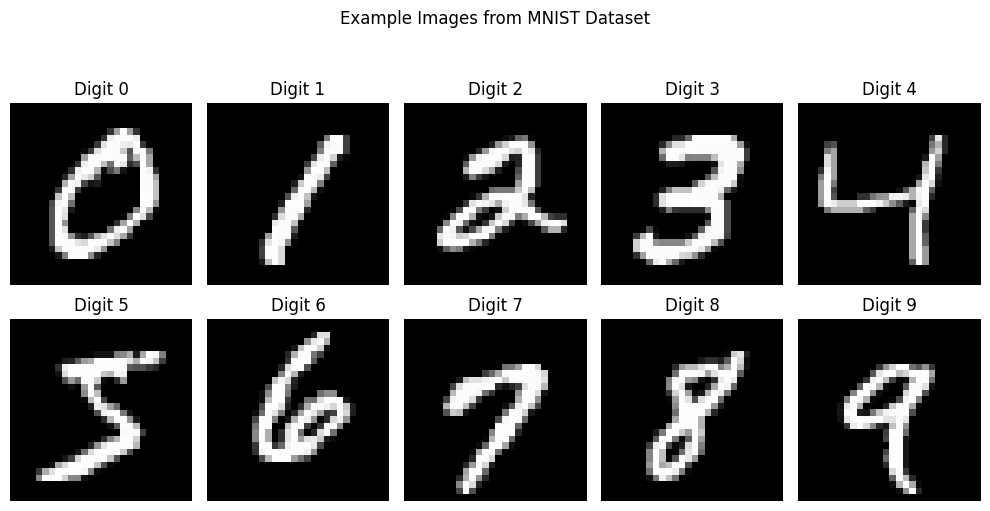

In [69]:
# Display example images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_all[y_all == i][0], cmap='gray')
    plt.title(f'Digit {i}')
    plt.axis('off')
plt.suptitle('Example Images from MNIST Dataset', y=1.05)
plt.savefig('mnist_images.png')
plt.tight_layout()
plt.show()

In [70]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and normalize images
X_train = X_train.reshape((-1, 28, 28, 1)) / 255.0
X_test = X_test.reshape((-1, 28, 28, 1)) / 255.0

In [71]:
print('Train images shape: ',X_train.shape)
print('Train labels shape: ',y_train.shape)
print('Test images shape: ',X_test.shape)
print('Test images shape: ',y_test.shape)

Train images shape:  (60000, 28, 28, 1)
Train labels shape:  (60000,)
Test images shape:  (10000, 28, 28, 1)
Test images shape:  (10000,)


In [72]:
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Training labels shape: (60000,)
Test labels shape: (10000,)


In [73]:
def add_noise_to_mnist(images, noise_level):
    """
    Add Gaussian noise with specified variance (noise_level) to the MNIST images.

    Parameters:
        images (numpy.ndarray): The MNIST images array.
        noise_level (float): The variance of the Gaussian noise to be added.

    Returns:
        numpy.ndarray: The MNIST images with added noise.
    """
    noisy_images = images + noise_level * np.random.randn(*images.shape)
    noisy_images = np.clip(noisy_images, 0., 1.)
    return noisy_images

In [74]:
# Define noise levels
noise_levels = [0.05, 0.1, 0.175, 0.25, 0.3, 0.5, 0.62, 0.75]

# List to store CNN models for different noise levels
cnn_models = []

# Define callbacks for early stopping
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

for noise_level in noise_levels:
    print(f"Training CNN model for noise level: {noise_level}")
    # Add noise to the training data
    X_train_noise = add_noise_to_mnist(X_train, noise_level)

    # Split the noisy data into train and validation sets
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_noise, y_train, test_size=0.2, random_state=42)

    # Create CNN model
    cnn_model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])

    # Compile the model
    cnn_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

    # Train the model with early stopping
    history = cnn_model.fit(X_train_split, y_train_split, epochs=20, validation_data=(X_val_split, y_val_split), callbacks=[early_stopping])

    # Add the model to the list
    cnn_models.append(cnn_model)

Training CNN model for noise level: 0.05


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.8768 - loss: 0.4018 - val_accuracy: 0.9772 - val_loss: 0.0729
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 78s 33ms/step - accuracy: 0.9837 - loss: 0.0565 - val_accuracy: 0.9856 - val_loss: 0.0463
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9891 - loss: 0.0357 - val_accuracy: 0.9847 - val_loss: 0.0495
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9900 - loss: 0.0293 - val_accuracy: 0.9879 - val_loss: 0.0437
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9924 - loss: 0.0224 - val_accuracy: 0.9877 - val_loss: 0.0472
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9946 - loss: 0.0163 - val_accuracy: 0.9890 - val_loss: 0.0410
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9960 - loss: 0.0126 - val_accuracy: 0.9883 - val_loss: 0.0480
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9956 -

In [75]:
# Evaluate the models on test data
test_results = []
for cnn_model in cnn_models:
    loss, accuracy = cnn_model.evaluate(X_test, y_test)
    test_results.append({'loss': loss, 'accuracy': accuracy})

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9874 - loss: 0.0467
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9808 - loss: 0.0616
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9768 - loss: 0.0692
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9778 - loss: 0.0803
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9674 - loss: 0.0977
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9600 - loss: 0.1306
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9626 - loss: 0.1343
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9449 - loss: 0.1771


In [76]:
# Print results
print("Results:")
for noise_level, result in zip(noise_levels, test_results):
    print(f"Noise Level: {noise_level}, Loss: {result['loss']}, Accuracy: {result['accuracy']}")

Results:
Noise Level: 0.05, Loss: 0.03838874027132988, Accuracy: 0.9894000291824341
Noise Level: 0.1, Loss: 0.05605120211839676, Accuracy: 0.982699990272522
Noise Level: 0.175, Loss: 0.05895695090293884, Accuracy: 0.9803000092506409
Noise Level: 0.25, Loss: 0.062143243849277496, Accuracy: 0.9821000099182129
Noise Level: 0.3, Loss: 0.0824013352394104, Accuracy: 0.9735999703407288
Noise Level: 0.5, Loss: 0.10649532824754715, Accuracy: 0.9684000015258789
Noise Level: 0.62, Loss: 0.11023075878620148, Accuracy: 0.9690999984741211
Noise Level: 0.75, Loss: 0.14419379830360413, Accuracy: 0.9545000195503235


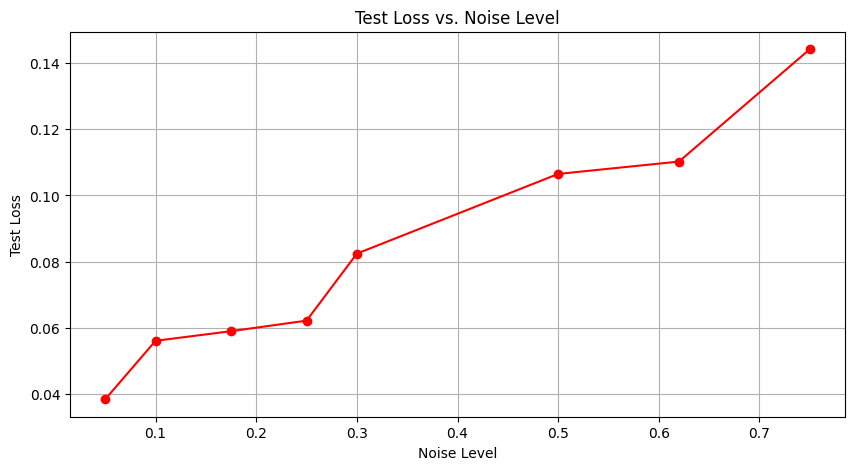

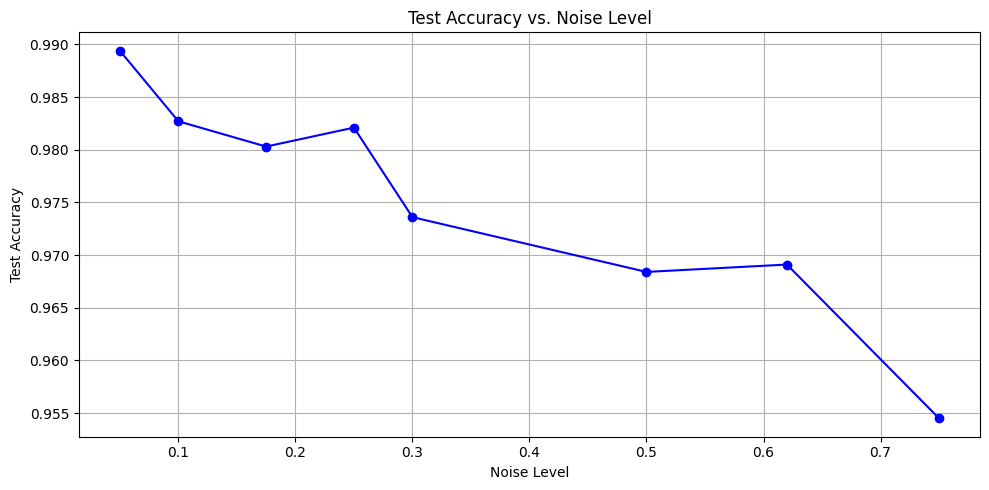

In [77]:
cnn_test_losses = []
cnn_test_accuracies = []

for result in test_results:
    cnn_test_losses.append(result['loss'])
    cnn_test_accuracies.append(result['accuracy'])

# Plot test loss and accuracy vs. noise level
plt.figure(figsize=(10, 5))
plt.plot(noise_levels, cnn_test_losses, marker='o', color = 'r')
plt.title('Test Loss vs. Noise Level')
plt.xlabel('Noise Level')
plt.ylabel('Test Loss')
plt.grid(True)


plt.figure(figsize=(10, 5))
plt.plot(noise_levels, cnn_test_accuracies, marker='o', color = 'b')
plt.title('Test Accuracy vs. Noise Level')
plt.xlabel('Noise Level')
plt.ylabel('Test Accuracy')
plt.grid(True)


plt.tight_layout()
plt.show()

In [78]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

train_images_flat = x_train.reshape((len(x_train), 28*28))
test_images_flat = x_test.reshape((len(x_test), 28*28))

In [79]:
def denoising_autoencoder():
    input_layer = Input(shape=(28*28,))
    encoded = Dense(128, activation='relu')(input_layer)
    decoded = Dense(28*28, activation='sigmoid')(encoded)

    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')
    return autoencoder

In [80]:
dae_models = []
histories = []

def add_noise(images, noise_factor=0.5):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    noisy_images = np.clip(noisy_images, 0., 1.)
    return noisy_images

for noise_level in noise_levels:
    print(f"Training denoising autoencoder for noise level: {noise_level}")
    noisy_train_images = add_noise(train_images_flat, noise_factor=noise_level)

    autoencoder = denoising_autoencoder()

    history = autoencoder.fit(noisy_train_images, train_images_flat,
                              epochs=20, batch_size=256, validation_split=0.1, callbacks=[early_stopping])

    dae_models.append(autoencoder)
    histories.append(history)

Training denoising autoencoder for noise level: 0.05
Epoch 1/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.3231 - val_loss: 0.1408
Epoch 2/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1294 - val_loss: 0.1046
Epoch 3/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1000 - val_loss: 0.0908
Epoch 4/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0885 - val_loss: 0.0844
Epoch 5/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0826 - val_loss: 0.0805
Epoch 6/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0791 - val_loss: 0.0779
Epoch 7/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0766 - val_loss: 0.0760
Epoch 8/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0750 - val_loss: 0.0746
Epoch 9/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0736 - val_loss: 0.0735
Epoch 10/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0726 - val_loss: 0.0725
Epoch 11/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0716 - val_l

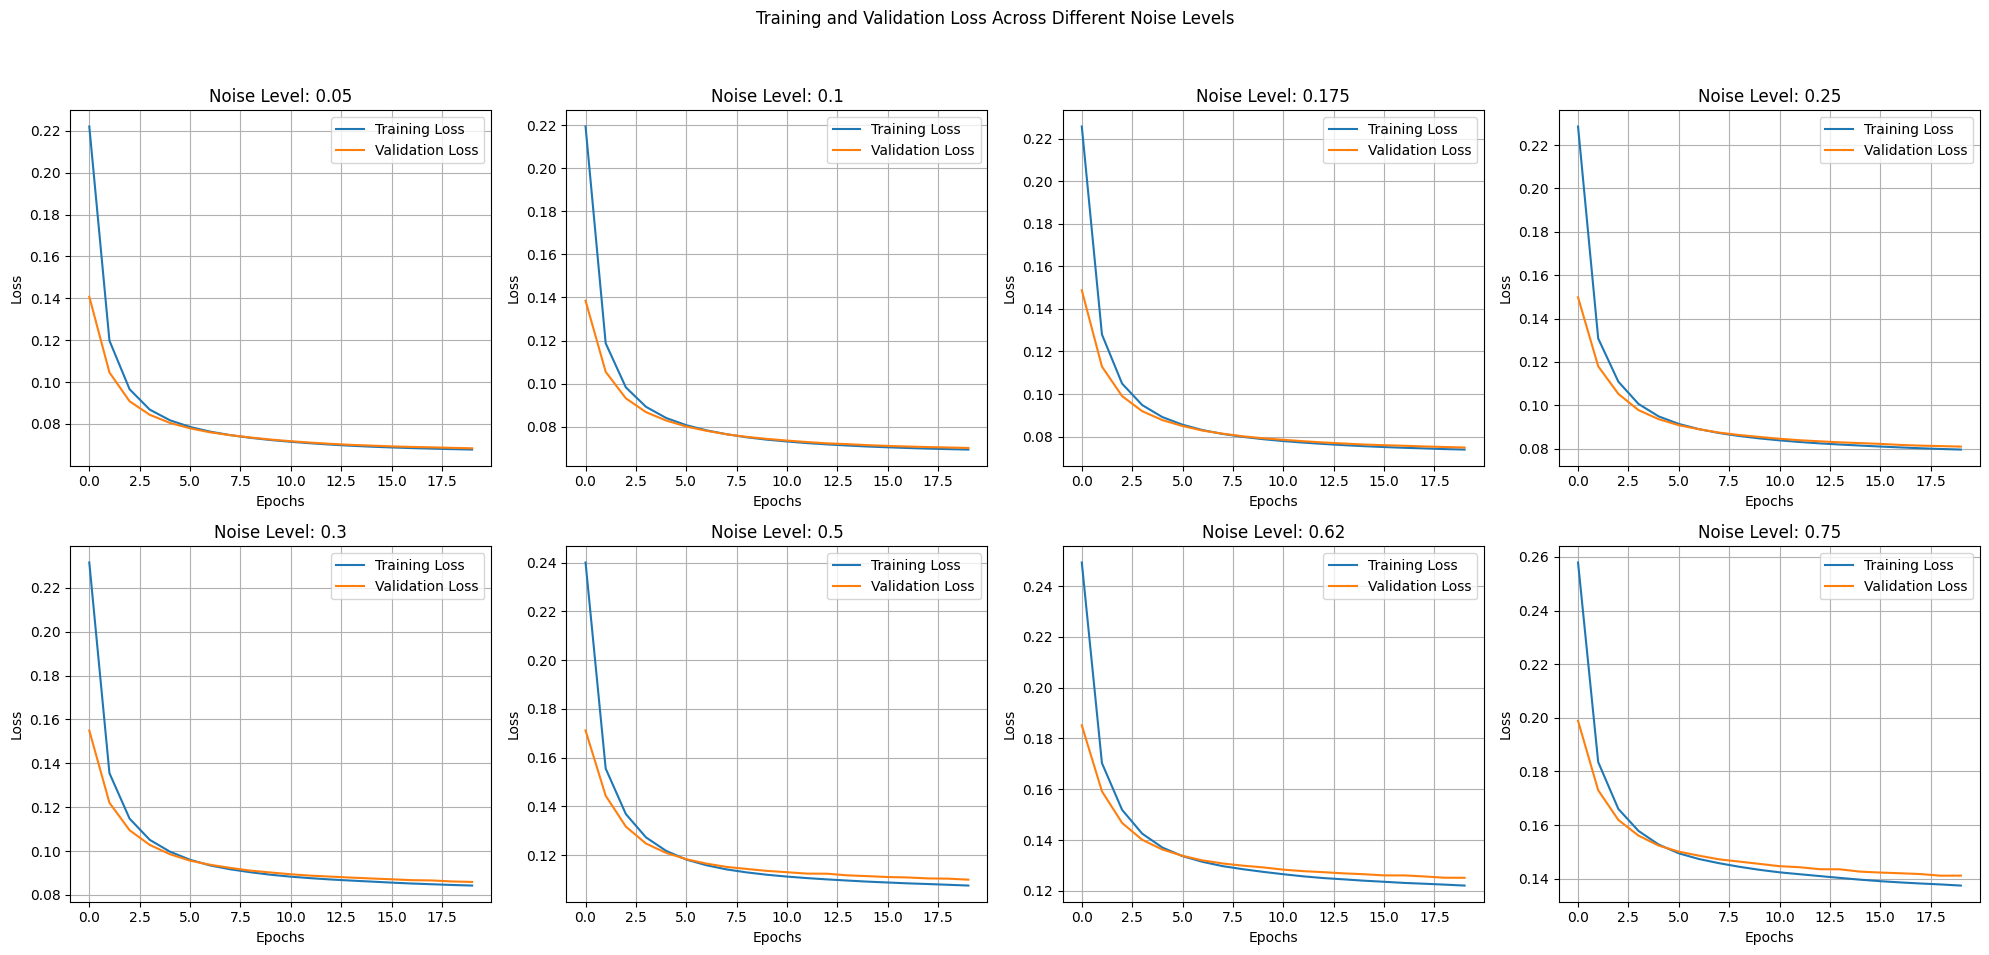

In [81]:
# Number of plots, and setting up subplots grid
num_plots = len(histories)
cols = 4  # Maximum of 4 columns per row
rows = (num_plots + cols - 1) // cols  # Calculate rows needed

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))  # Adjust size as needed
fig.suptitle('Training and Validation Loss Across Different Noise Levels')

# Iterate through all histories and plot them
for i, history in enumerate(histories):
    ax = axes[i // cols, i % cols] if rows > 1 else axes[i % cols]  # Adjust indexing based on rows
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title(f'Noise Level: {noise_levels[i]}')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()
    ax.grid(True)

# If there are any empty subplots, turn them off
for i in range(num_plots, rows * cols):
    axes[i // cols, i % cols].axis('off') if rows > 1 else axes[i % cols].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


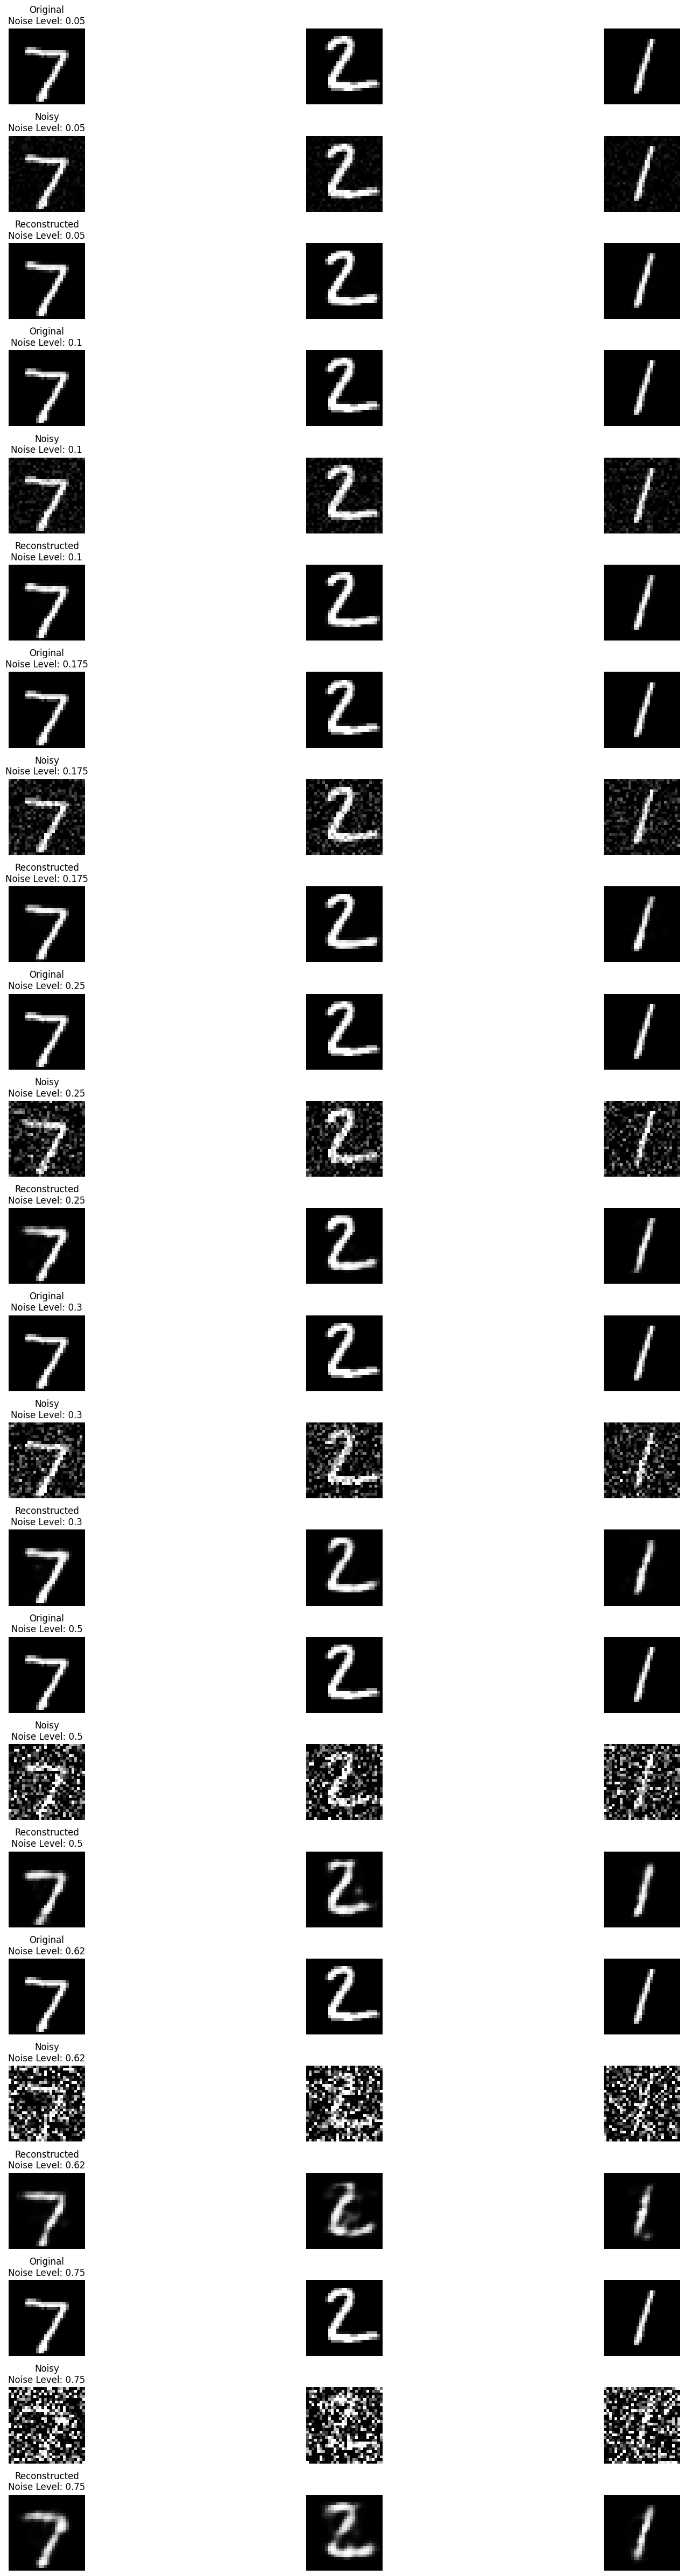

In [82]:
def display_comparison(models, noise_levels, test_images, n_images=10):
    num_levels = len(models)
    plt.figure(figsize=(20, 6 * num_levels))  # Adjust size to accommodate titles and more rows

    for idx, (model, noise_level) in enumerate(zip(models, noise_levels)):
        # Add noise to the test data
        noisy_images = add_noise(test_images.reshape(-1, 28, 28), noise_level)  # Ensure input is in 28x28 format for noise addition
        # Flatten the noisy images for prediction
        noisy_images_flat = noisy_images.reshape(noisy_images.shape[0], -1)
        # Predict the reconstructed images from the noisy data
        reconstructed_images = model.predict(noisy_images_flat)

        for i in range(n_images):
            # Original Image
            ax = plt.subplot(num_levels * 3, n_images, i + 1 + (idx * 3 * n_images))
            plt.imshow(test_images[i].reshape(28, 28), cmap='gray')  # Reshape flat images to 28x28 for display
            if i == 0:
                plt.title(f"Original\nNoise Level: {noise_level}")
            plt.axis('off')

            # Noisy Image
            ax = plt.subplot(num_levels * 3, n_images, i + 1 + n_images + (idx * 3 * n_images))
            plt.imshow(noisy_images[i].reshape(28, 28), cmap='gray')  # Reshape flat noisy images to 28x28 for display
            if i == 0:
                plt.title(f"Noisy\nNoise Level: {noise_level}")
            plt.axis('off')

            # Reconstructed Image
            ax = plt.subplot(num_levels * 3, n_images, i + 1 + 2 * n_images + (idx * 3 * n_images))
            plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')  # Reshape flat predictions to 28x28 for display
            if i == 0:
                plt.title(f"Reconstructed\nNoise Level: {noise_level}")
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example call (ensure to replace `dae_models`, `noise_levels`, `test_images_flat` with your actual variables)
display_comparison(dae_models, noise_levels, test_images_flat, n_images=3)


In [83]:
from keras.losses import MeanSquaredError

# Function to calculate MSE
def calculate_mse(original, reconstructed):
    mse = MeanSquaredError()
    return mse(original, reconstructed).numpy()

reconstruction_errors = []

for i, noise_level in enumerate(noise_levels):
    print(f"Calculating reconstruction error for noise level: {noise_level}")
    # Add noise to original test images
    noisy_test_images = add_noise(test_images_flat, noise_factor=noise_level)

    # Use the DAE to reconstruct images from the noisy dataset
    reconstructed_images = dae_models[i].predict(noisy_test_images)

    # Calculate MSE between original and reconstructed images
    error = calculate_mse(test_images_flat, reconstructed_images)
    reconstruction_errors.append(error)
    print(f"Reconstruction MSE at noise level {noise_level}: {error}")


Calculating reconstruction error for noise level: 0.05
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Reconstruction MSE at noise level 0.05: 0.002115140436217189
Calculating reconstruction error for noise level: 0.1
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Reconstruction MSE at noise level 0.1: 0.0025923149660229683
Calculating reconstruction error for noise level: 0.175
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Reconstruction MSE at noise level 0.175: 0.0039244298823177814
Calculating reconstruction error for noise level: 0.25
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Reconstruction MSE at noise level 0.25: 0.0056661684066057205
Calculating reconstruction error for noise level: 0.3
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Reconstruction MSE at noise level 0.3: 0.007093324325978756
Calculating reconstruction error for noise level: 0.5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Reconstruction MSE at noise level 0.5: 0.01473793014883995
Calculating reconstruction error for noise level: 0.62
313/3

In [86]:
def build_classifier(encoded_dim):
    inputs = Input(shape=(encoded_dim,))
    x = Dense(64, activation='relu')(inputs)
    outputs = Dense(10, activation='softmax')(x)
    classifier_model = Model(inputs=inputs, outputs=outputs)
    classifier_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return classifier_model

In [87]:
classifier_histories = []  # List to store histories for each noise level
classifier_test_losses = []
classifier_test_accuracies = []

for i, noise_level in enumerate(noise_levels):
    print(f"Building and training classifier for noise level: {noise_level}")
    autoencoder = dae_models[i]
    encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[1].output)

    noisy_train_images = add_noise(train_images_flat, noise_factor=noise_level)
    noisy_test_images = add_noise(test_images_flat, noise_factor=noise_level)

    encoded_train = encoder.predict(noisy_train_images)
    encoded_test = encoder.predict(noisy_test_images)

    classifier = build_classifier(encoded_train.shape[1])
    history = classifier.fit(encoded_train, y_train, epochs=10, batch_size=32)
    classifier_histories.append(history)

    classifier_test_loss, classifier_test_accuracy = classifier.evaluate(encoded_test, y_test, verbose=0)
    print(f"Test accuracy for noise level {noise_level}: {classifier_test_accuracy}")
    classifier_test_losses.append(classifier_test_loss)
    classifier_test_accuracies.append(classifier_test_accuracy)

Building and training classifier for noise level: 0.05
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7209 - loss: 0.9482
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9108 - loss: 0.3030
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9287 - loss: 0.2394
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9414 - loss: 0.1972
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9467 - loss: 0.1773
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9549 - loss: 0.1498
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9573 - loss: 0.1437
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9612 - loss: 0.1285
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9628 - loss: 0.1222
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.

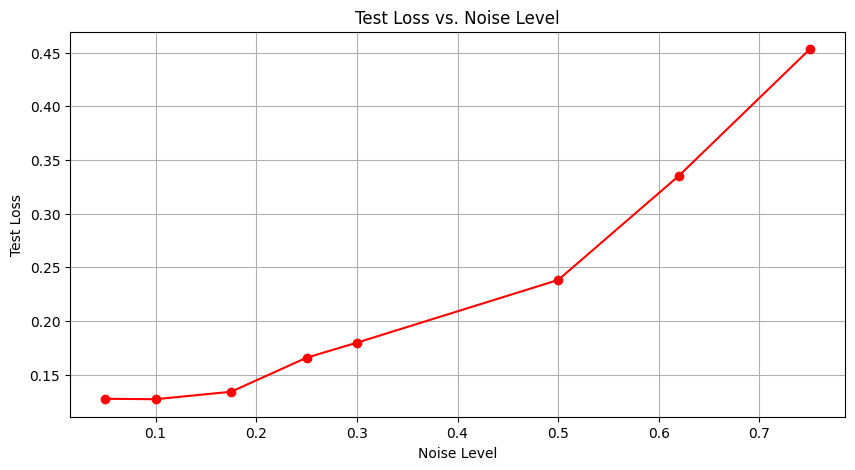

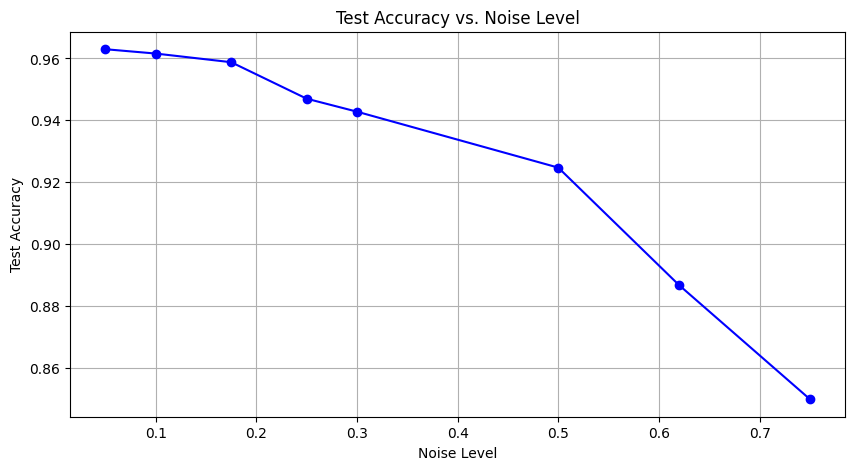

In [88]:
# Plotting test losses
plt.figure(figsize=(10, 5))
plt.plot(noise_levels, classifier_test_losses, marker='o', linestyle='-', color='r')
plt.title('Test Loss vs. Noise Level')
plt.xlabel('Noise Level')
plt.ylabel('Test Loss')
plt.grid(True)

# Plotting test accuracies
plt.figure(figsize=(10, 5))
plt.plot(noise_levels, classifier_test_accuracies, marker='o', linestyle='-', color='b')
plt.title('Test Accuracy vs. Noise Level')
plt.xlabel('Noise Level')
plt.ylabel('Test Accuracy')
plt.grid(True)

plt.show()